In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold

##### Exploración de datos

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/heart_2022_no_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [5]:
df.shape

(246022, 40)

In [6]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [7]:
for column_content in df.columns:
    print(column_content)
    print(df[column_content].unique(), "\n")

State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands'] 

Sex
['Female' 'Male'] 

GeneralHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor'] 

PhysicalHealthDays
[ 4.  0.  5.  3.  2. 25. 30. 15. 29.  8. 16. 20. 10.  9.  7.  1. 21.  6.
 27. 14. 12. 11. 13. 28. 17. 23. 24. 26. 18. 22. 19.] 

MentalHealthDays
[ 0. 15.  4. 25.  5. 30. 27.  3.  2.  1. 10. 20. 21.  6.  7.  8. 14.  9.
 12. 18. 29. 28. 17. 11

Tenemos 40 variables, tanto categóricas como cuantitativas. Varias de ellas son objetos que contienen diferentes tipos de información. Tenemos respuestas cerradas de Sí o No, respuestas de evaluación, respuestas de cantidad, etc. En cuanto a las variables de tipo Float, son muy heterogéneas, lo cual es comprensible dada la naturaleza de cada variable.


- Por lo tanto, es necesario estandarizar y normalizar todos estos datos para modelado predictivo.

In [8]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

No hay valores nulos en el conjunto de datos.

## 2. Visualización de la variable objetivo [HadHeartAttack]




In [9]:
df_hha = df['HadHeartAttack'].value_counts()
df_hha

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64

<ipython-input-10-8f5197fae6ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=df_hha.index, y=df_hha, palette= cols, ax=ax1, )


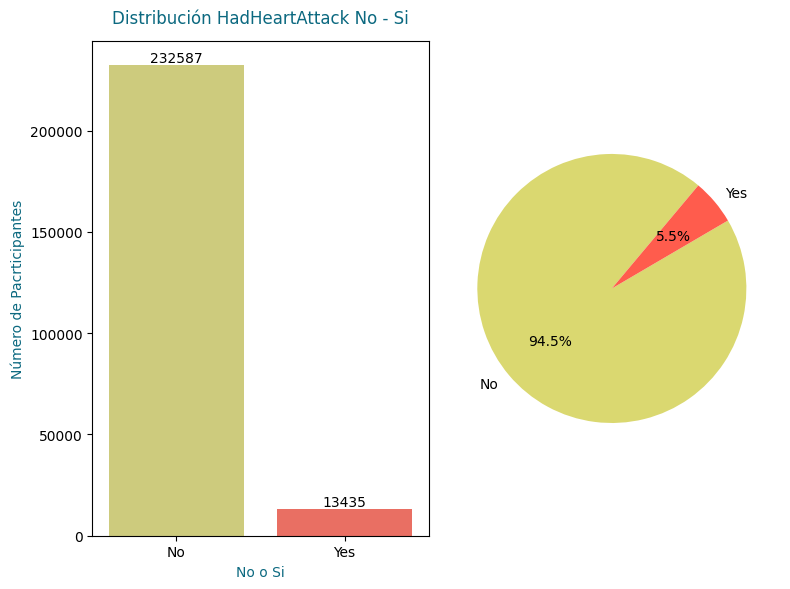

In [10]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(8,6), dpi=100)
cols = ['#FF5C4D' if x < (max(df_hha)) else '#DAD870' for x in df_hha]

ax1 = sns.barplot(x=df_hha.index, y=df_hha, palette= cols, ax=ax1, )
for i in ax1.containers:
    ax1.bar_label(i,)
ax1.set_xlabel('No o Si', color='#0C6980')
ax1.set_ylabel("Número de Pacrticipantes", color='#0C6980')
ax1.set_title("Distribución HadHeartAttack No - Si", y=1.02, color='#0C6980')
plt.tight_layout()

ax2 = plt.pie(df_hha.values, labels=df_hha.index, autopct='%1.1f%%', startangle=50, colors= ['#DAD870', '#FF5C4D'])
plt.tight_layout()
plt.draw()

## 3. Normalización de variables para el modelado

Habrá un primer paso para transformar las variables categóricas en numéricas. Usando Replace() y lambda().

Luego, habrá una normalización de las variables numéricas con MinMaxScaler(), lo cual se hará una vez que los datos se hayan dividido (X_train y X_test) para evitar el sobreajuste.


In [11]:
dict_replace = {'No':0, 'Yes' : 1}
df = df.replace(dict_replace)

dict_GeneralHealth = {'Excellent': 0, 'Very good' : 1, 'Good' : 2, 'Fair': 3, 'Poor': 4}
df['GeneralHealth'] = df['GeneralHealth'].replace(dict_GeneralHealth)

dict_RemovedTeeth = {'None of them': 0, '1 to 5' : 1, '6 or more, but not all' : 2, 'All': 3}
df['RemovedTeeth'] = df['RemovedTeeth'].replace(dict_RemovedTeeth)

dict_HadDiabetes = {'No': 0, 'Yes' : 1, 'Yes, but only during pregnancy (female)' : 2,
                    'No, pre-diabetes or borderline diabetes': 3}
df['HadDiabetes'] = df['HadDiabetes'].replace(dict_HadDiabetes)

dict_SmokerStatus = {'Never smoked': 0, 'Current smoker - now smokes some days' : 1,
                     'Current smoker - now smokes every day' : 2, 'Former smoker': 3}
df['SmokerStatus'] = df['SmokerStatus'].replace(dict_SmokerStatus)

dict_ECigaretteUsage = {'Never used e-cigarettes in my entire life': 0,
                        'Use them every day' : 1, 'Use them some days' : 2, 'Not at all (right now)': 3}
df['ECigaretteUsage'] = df['ECigaretteUsage'].replace(dict_ECigaretteUsage)

dict_TetanusLast10Tdap = {'Yes, received Tdap': 0,'Yes, received tetanus shot but not sure what type' : 1,
                          'Yes, received tetanus shot, but not Tdap' : 2,
                          'No, did not receive any tetanus shot in the past 10 years': 3}
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].replace(dict_TetanusLast10Tdap)

dict_CovidPos = {'No': 0, 'Yes' : 1, 'Tested positive using home test without a health professional' : 2}
df['CovidPos'] = df['CovidPos'].replace(dict_CovidPos)

El índice de masa corporal (IMC) ideal de una persona debería estar entre 18.5 y 24.9, lo que asegura el mejor estado de salud posible. Se considera sobrepeso cuando el IMC está entre 25 y 29.9; aún no se alcanza la obesidad, pero el peso ya se considera demasiado alto. Finalmente, cuando el IMC alcanza o supera el umbral de 30, se distinguen varios tipos de obesidad según su gravedad:

- Obesidad de primer grado o moderada (IMC 30 - 34.9).
- Obesidad de segundo grado (IMC 35 - 39.9).
- Obesidad mórbida (IMC 40 - 40.9).
- Obesidad masiva o "superobesidad" (IMC superior a 50).

In [12]:
df.BMI = df.BMI.apply(lambda x : 0 if x <= 24.9 else 1)
df.BMI.value_counts()

BMI
1    173462
0     72560
Name: count, dtype: int64

In [13]:
df['Sex'] = df['Sex'].apply(lambda x : 0 if x == 'Female' else 1)
df['Sex'].value_counts()

Sex
0    127811
1    118211
Name: count, dtype: int64

In [14]:
df['RaceEthnicityCategory'] = df['RaceEthnicityCategory'].apply(lambda x : 0 if x =='White only, Non-Hispanic'else 1)
df['RaceEthnicityCategory'].value_counts()

RaceEthnicityCategory
0    186336
1     59686
Name: count, dtype: int64

In [15]:
df['AgeCategory'] = df['AgeCategory'].replace(to_replace = df['AgeCategory'].unique(), value =  np.arange(0,13,1))

In [16]:
for column_content in df.columns:
    print(column_content)
    print(df[column_content].unique(),"\n")

State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands'] 

Sex
[0 1] 

GeneralHealth
[1 3 2 0 4] 

PhysicalHealthDays
[ 4.  0.  5.  3.  2. 25. 30. 15. 29.  8. 16. 20. 10.  9.  7.  1. 21.  6.
 27. 14. 12. 11. 13. 28. 17. 23. 24. 26. 18. 22. 19.] 

MentalHealthDays
[ 0. 15.  4. 25.  5. 30. 27.  3.  2.  1. 10. 20. 21.  6.  7.  8. 14.  9.
 12. 18. 29. 28. 17. 11. 16. 13. 26. 22. 24. 19. 23.] 

LastCheckupTim

In [17]:
# Eliminar las variables 'State' y 'LastCheckupTime' porque no aportan valor.

df.drop(['State', 'LastCheckupTime'], axis=1, inplace= True)

## 3.1 Dividimos el dataframe en X_train y X_test


In [18]:
feats= df.drop('HadHeartAttack', axis=1)

target = df['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, train_size=0.8, random_state = 42)

**¿Por qué normalizar antes del modelado?**

La idea principal detrás de la normalización/estandarización siempre es la misma. Las variables medidas en diferentes escalas no contribuyen igualmente a la precisión del modelo y a la función aprendida por el modelo, lo que podría crear sesgos. Por lo tanto, para abordar este problema potencial, la normalización de características, como la escala MinMax, se utiliza generalmente antes del ajuste del modelo.

El código está escalando las variables independientes para que se encuentren en el rango de 0 a 1. Esto es importante porque los valores de algunas variables pueden estar en miles y otros en rangos pequeños. Por lo tanto, para manejar tales casos, la escala es importante.

La normalización o estandarización se realiza después de dividir los datos para evitar el sobreajuste del modelo.

In [19]:
# MinMaxScaler

#scaled = MinMaxScaler()
scaled = StandardScaler()
X_train.loc[:, ['PhysicalHealthDays','MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms']] = scaled.fit_transform(X_train.loc[:, ['PhysicalHealthDays','MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms']])
X_test.loc[:, ['PhysicalHealthDays','MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms']] = scaled.transform(X_test.loc[:, ['PhysicalHealthDays','MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms']])


## 4. Aplicando el modelo de Regresión Logística
La Regresión Logística es fundamental en el campo del aprendizaje automático, proporcionando un marco sólido para problemas de clasificación binaria.

**¿Qué es la Regresión Logística?**
Contrario a su nombre, la Regresión Logística es un algoritmo de clasificación en lugar de un algoritmo de regresión. Diseñado específicamente para tareas de clasificación binaria, predice la probabilidad de que una instancia pertenezca a una clase particular. A pesar del término "regresión", utiliza la función logística (sigmoide) para restringir la salida entre 0 y 1.

**Objetivo y Aplicación:**
**Clasificación Binaria:**
La Regresión Logística se utiliza ampliamente cuando la variable de resultado es binaria, lo que significa que tiene dos clases. Ejemplos incluyen detección de spam (spam o no spam), diagnóstico médico (enfermo o sano) y análisis de riesgo crediticio (incumplimiento o no incumplimiento).

**Estimación de Probabilidades:**
Más allá de la clasificación simple, la Regresión Logística proporciona estimaciones de probabilidad. En lugar de una asignación estricta de clase, cuantifica la probabilidad de que una instancia pertenezca a una clase específica. El rendimiento del modelo se evalúa típicamente utilizando métricas como precisión, exactitud, sensibilidad y el área bajo la curva característica de operación del receptor (ROC).

In [20]:
  # Creación y entrenamiento del modelo:
  # se crea una instancia de LogisticRegression y se entrena con el conjunto de datos de entrenamiento (X_train y y_train).
  # El parámetro max_iter especifica el número máximo de iteraciones del algoritmo de optimización utilizado para encontrar los parámetros óptimos del modelo.
  mod_logReg = LogisticRegression(max_iter=200)
  mod_logReg.fit(X_train, y_train)

  #Evaluación del modelo con los conjuntos de entrenamiento y de prueba
  print('Score de Logistic Regression en el conjunto de entrenamiento:', mod_logReg.score(X_train, y_train))
  print('Score de Logistic Regression en el conjunto de prueba:', mod_logReg.score(X_test, y_test))


  #Generación de probabilidades y predicciones basadas en un umbral:
  # calcula las probabilidades de que las observaciones pertenezcan a la clase 1. Luego, basado en un umbral de 0.5, estas probabilidades se convierten en predicciones clasificadas (0 o 1).
  y_probs = mod_logReg.predict_proba(X_test)[:, 1]  #extrae específicamente las probabilidades de que las muestras en el conjunto de prueba (X_test) pertenezcan a la clase 1.
  y_pred = (y_probs >= 0.5).astype(int)  # convierte estas probabilidades en predicciones de clase binaria. Utiliza un umbral de decisión de 0.5, que es común en la clasificación binaria.
  # Cualquier probabilidad que sea igual o superior a 0.5 resultará en una predicción de 1 (perteneciente a la clase 1), y cualquier probabilidad por debajo de 0.5 resultará en una predicción de 0 (perteneciente a la clase 0).

  print('Probabilidades:' , y_probs)

Score de Logistic Regression en el conjunto de entrenamiento: 0.9480939146516815
Score de Logistic Regression en el conjunto de prueba: 0.9487450462351387
Probabilidades: [0.01557208 0.02439536 0.25293058 ... 0.01538475 0.01274605 0.00860964]


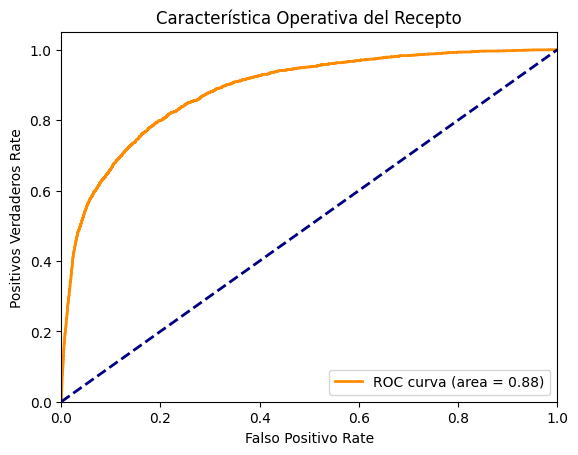

In [21]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curva (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo Rate')
plt.ylabel('Positivos Verdaderos Rate')
plt.title('Característica Operativa del Recepto')
plt.legend(loc="lower right")
plt.show()


In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))

# Calcular la matriz de confusión
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calcular la precisión
print("Precision:", precision_score(y_test, y_pred))

# Calcular el recall
print("Recall:", recall_score(y_test, y_pred))

# Calcular el F1 score
print("F1 Score:", f1_score(y_test, y_pred))

# Calcular el ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy: 0.9487450462351387
Confusion Matrix:
 [[46037   536]
 [ 1986   646]]
Precision: 0.5465313028764806
Recall: 0.2454407294832827
F1 Score: 0.3387519664394337
ROC AUC Score: 0.6169659576817569
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46573
           1       0.55      0.25      0.34      2632

    accuracy                           0.95     49205
   macro avg       0.75      0.62      0.66     49205
weighted avg       0.94      0.95      0.94     49205

